In [23]:
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [25]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
X_train # It is a 3d array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [28]:
X_train[0] # Grabbing the first batch from 28*28 Matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


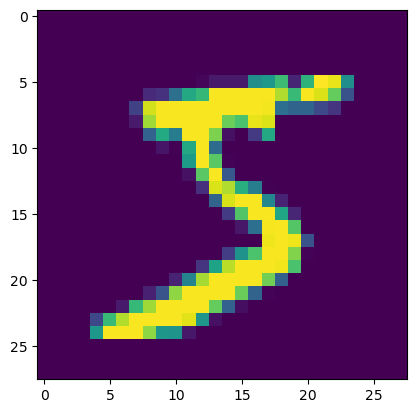

In [29]:
plt.imshow(X_train[0])
print(y_train[0])   # For Getting Corrosponding Label for X_train[0]

# Normalizing the data

***Since the values are extremes so going with a common approach rather than StandardScaler***

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flattening the first layer 

***28*28 Matrix is 2d and we can say 28*28=784 
Representing it as 1d in the input layer by the model***

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) # Since it is a mutli-class classification problem we, won't use sigmoid fx 

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.9068 - val_loss: 0.1828 - val_accuracy: 0.9488
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1549 - accuracy: 0.9548 - val_loss: 0.1407 - val_accuracy: 0.9592
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.9688 - val_loss: 0.1139 - val_accuracy: 0.9660
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0832 - accuracy: 0.9759 - val_loss: 0.1001 - val_accuracy: 0.9712
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0647 - accuracy: 0.9814 - val_loss: 0.0957 - val_accuracy: 0.9715
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0967 - val_accuracy: 0.9713
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0424 - accuracy: 0.9874 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 

In [36]:
model.evaluate(X_test,y_test) # Accuracy of 0.97

313/313 [==============================] - 0s 966us/step - loss: 0.0788 - accuracy: 0.9779


[0.0787927657365799, 0.9779000282287598]

In [37]:
(model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 0s 916us/step


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

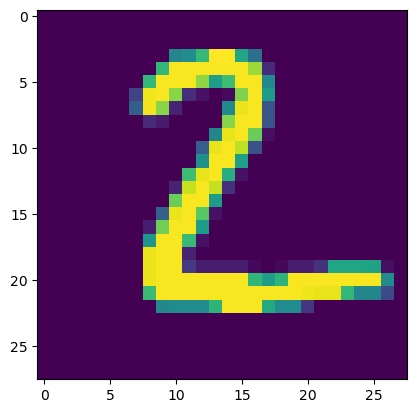

In [38]:
plt.imshow(X_test[1])

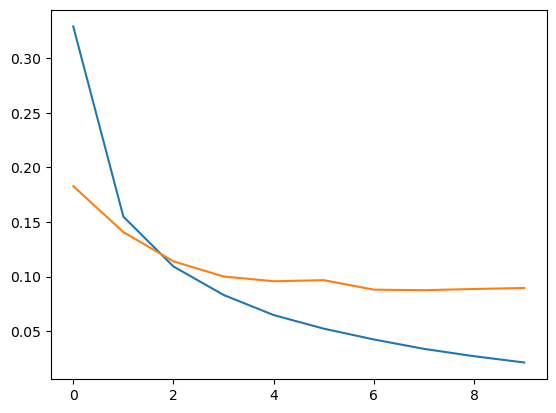

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

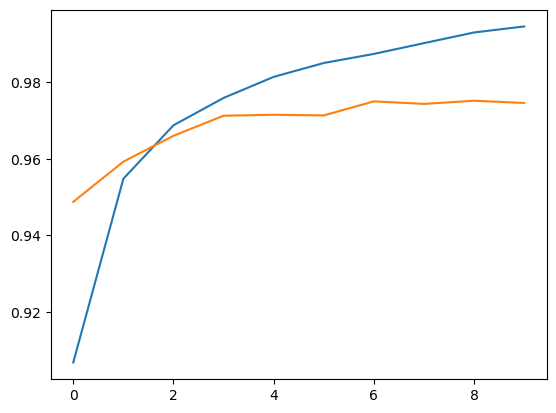

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])